In [373]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

In [392]:
l = 0.2
N_gridpoints = int(1/l) + 1
X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
x_grid = np.vstack([X.ravel(), Y.ravel()]).T
cov = np.exp(-distance_matrix(x_grid,x_grid, p=2)**2/(l**2))

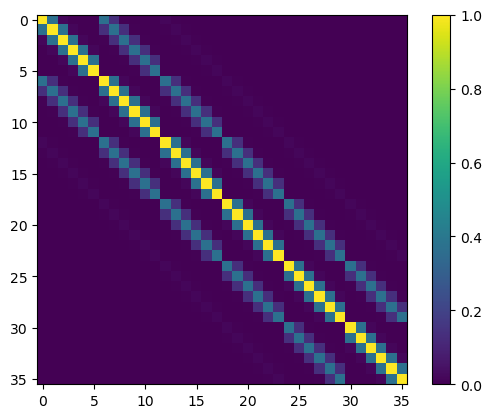

In [393]:
plt.imshow(cov)
plt.colorbar()

In [394]:
f = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)
if np.sum(f<0)>0:
    f = f - np.amin(f) + 0.02

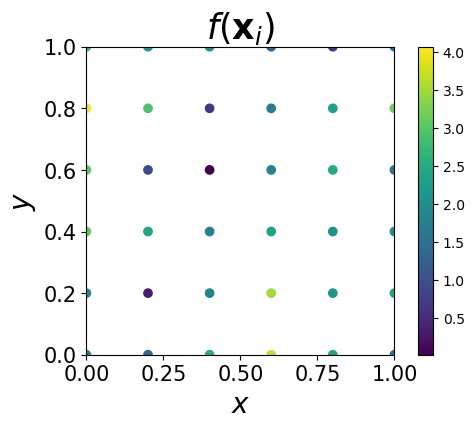

In [395]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x_grid[:,0], x_grid[:,1], c=f[0])
ax.set_title(r"$f(\mathbf{x}_i)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("2dgrfdelta.svg", bbox_inches='tight')

In [396]:
def RBFinterpolation(f, x_grid, cov, l):
    f_hat = np.dot(np.linalg.inv(cov),f[0])
    
    def function(x):
        l_int = 0.2
        terms = f_hat*np.exp(-np.sum((x - x_grid)**2, axis=-1)/(l**2))
        terms = terms[np.argsort(np.abs(terms))]
        return np.sum(terms)
        # return np.sum(f_hat*np.exp(-np.sum((x - x_grid)**2, axis=-1)/(2*l**2)))
    
    return function

function = RBFinterpolation(f, x_grid, cov, l)

In [397]:
X, Y = np.mgrid[0:1:64*1j, 0:1:64*1j]
x_i = np.vstack([X.ravel(), Y.ravel()]).T

In [398]:
f_i = np.zeros(len(x_i))
for i in range(len(x_i)):
    f_i[i] = function(x_i[i])

0.0126953125


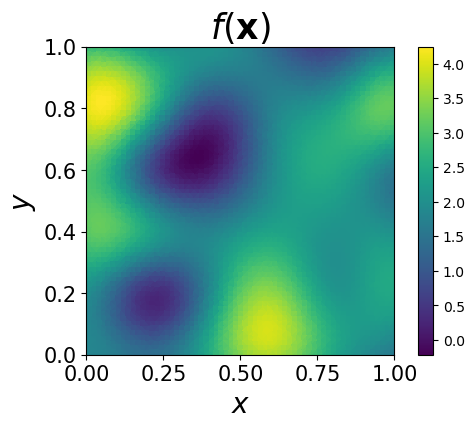

In [399]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x_i[:,0], x_i[:,1], f_i)
ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("2dRBFint.svg", bbox_inches='tight')
print(np.sum(f_i<0)/len(f_i))

(array([0.05738134, 0.05464889, 0.06011378, 0.06557867, 0.05464889,
        0.10383289, 0.10383289, 0.11203023, 0.10656534, 0.16121423,
        0.13662223, 0.15848179, 0.14208712, 0.18853868, 0.18034134,
        0.20493334, 0.2022009 , 0.25684979, 0.2513849 , 0.34975291,
        0.39893691, 0.36068269, 0.47271291, 0.36341513, 0.41806402,
        0.67491381, 0.59294047, 0.67764626, 0.56561603, 0.46178313,
        0.38254224, 0.31149868, 0.25684979, 0.24045512, 0.21859557,
        0.25684979, 0.22132801, 0.24045512, 0.12569245, 0.12022756,
        0.09563556, 0.11476267, 0.10110045, 0.10929778, 0.09563556,
        0.10929778, 0.09836801, 0.06011378, 0.04371911, 0.05191645]),
 array([-0.21638305, -0.12703426, -0.03768547,  0.05166333,  0.14101212,
         0.23036091,  0.3197097 ,  0.4090585 ,  0.49840729,  0.58775608,
         0.67710488,  0.76645367,  0.85580246,  0.94515125,  1.03450005,
         1.12384884,  1.21319763,  1.30254643,  1.39189522,  1.48124401,
         1.5705928 ,  1.65

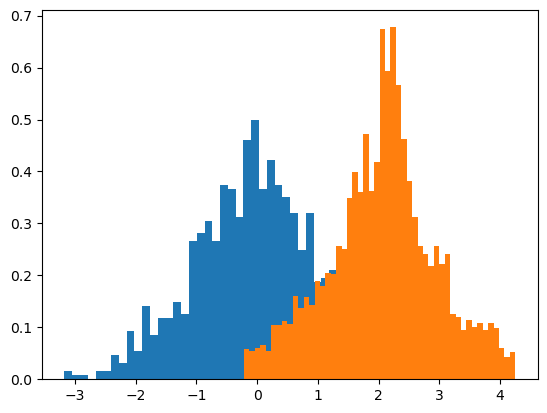

In [400]:
plt.hist(f_gauss, bins=50, density=True)
plt.hist(f_i, bins=50, density=True)

In [397]:
def normalized_gp_samples(NN, n_samples, length_scale, output_scale, gp_min):
    # GRF sample generation
    def RBF(x, length_scale, output_scale):
        N = x.shape[0]
        dist_mat = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                dist_mat[i,j] = np.linalg.norm(x[i,:] - x[j,:])
        r = (dist_mat/length_scale)**2        
        return output_scale * np.exp(-0.5 * r)

    X = np.zeros([NN**2, 2])
    xv, yv = np.meshgrid(np.linspace(0, 1, NN), np.linspace(0, 1, NN))
    X[:,0] = xv.flatten()
    X[:,1] = yv.flatten()
    
    K = RBF(X, length_scale, output_scale)
    plt.imshow(K)
    plt.show()
    L = np.linalg.cholesky(K + 1e-10*np.eye(NN**2))
    plt.imshow(L)
    plt.show()
    gp_samples = (L @ np.random.randn(NN**2, n_samples)) + gp_min
    min_v, max_v = gp_samples.min(), gp_samples.max()

    #normalized_sm = gp_samples
    normalized_sm = (gp_samples - min_v)/(max_v - min_v) + gp_min * (1 - (gp_samples - min_v)/(max_v - min_v))
    return normalized_sm

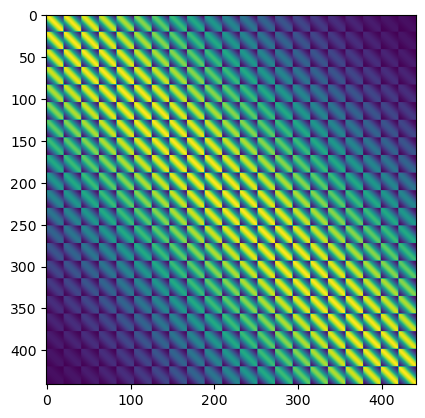

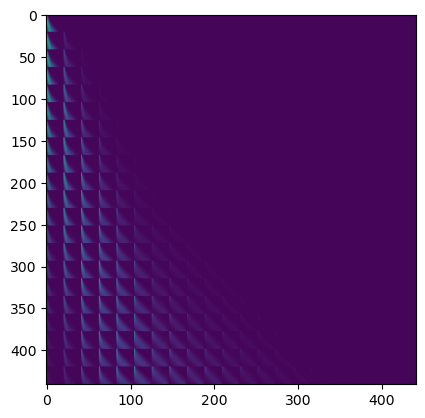

(441, 1)

In [398]:
NN = 21
n_samples = 1
length_scale = 0.4
output_scale = 1
gp_min = 0

X = np.zeros([NN**2, 2])
xv, yv = np.meshgrid(np.linspace(0, 1, NN), np.linspace(0, 1, NN))
X[:,0] = xv.flatten()
X[:,1] = yv.flatten()

g = normalized_gp_samples(NN, n_samples, length_scale, output_scale, gp_min)
g.shape

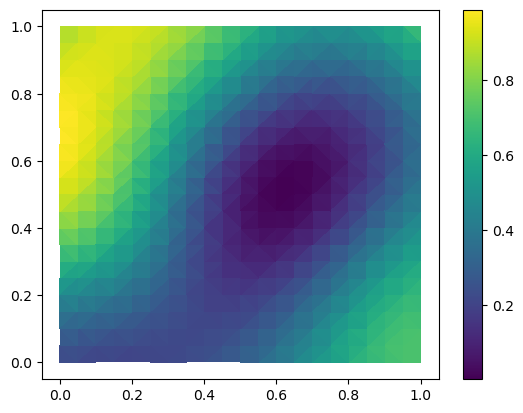

In [388]:
plt.tripcolor(X[:,0], X[:,1], g[:,0])
plt.colorbar()

In [67]:
l = 0.4
N_gridpoints = 21#int(1/l) + 1
X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
x_grid = np.vstack([X.ravel(), Y.ravel()]).T
cov = np.exp(-distance_matrix(x_grid,x_grid, p=2)**2/(l**2))

(441, 441)


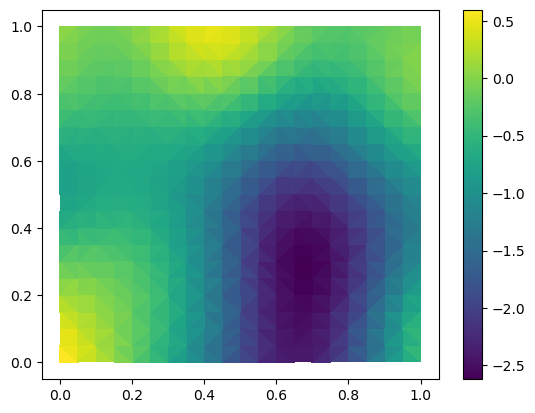

In [68]:
L = np.linalg.cholesky(cov + 1e-10*np.eye(cov.shape[0]))
print(L.shape)
rand = np.random.normal(0,1,size=cov.shape[0])
f = L @ rand
plt.tripcolor(x_grid[:,0], x_grid[:,1], f)
plt.colorbar()

(array([0.27239514, 0.20429635, 0.23834575, 0.40859271, 0.10214818,
        0.27239514, 0.20429635, 0.27239514, 0.17024696, 0.06809878,
        0.27239514, 0.23834575, 0.23834575, 0.20429635, 0.13619757,
        0.10214818, 0.37454331, 0.37454331, 0.13619757, 0.20429635,
        0.27239514, 0.30644453, 0.34049392, 0.27239514, 0.17024696,
        0.27239514, 0.40859271, 0.51074088, 0.4426421 , 0.78313602,
        0.57883967, 0.61288906, 0.30644453, 0.57883967, 0.61288906,
        0.47669149, 0.57883967, 0.68098784, 0.4426421 , 0.4426421 ,
        0.34049392, 0.17024696, 0.20429635, 0.20429635, 0.13619757,
        0.17024696, 0.10214818, 0.03404939, 0.03404939, 0.03404939]),
 array([-2.62986677, -2.56327017, -2.49667357, -2.43007697, -2.36348038,
        -2.29688378, -2.23028718, -2.16369058, -2.09709398, -2.03049738,
        -1.96390078, -1.89730419, -1.83070759, -1.76411099, -1.69751439,
        -1.63091779, -1.56432119, -1.4977246 , -1.431128  , -1.3645314 ,
        -1.2979348 , -1.23

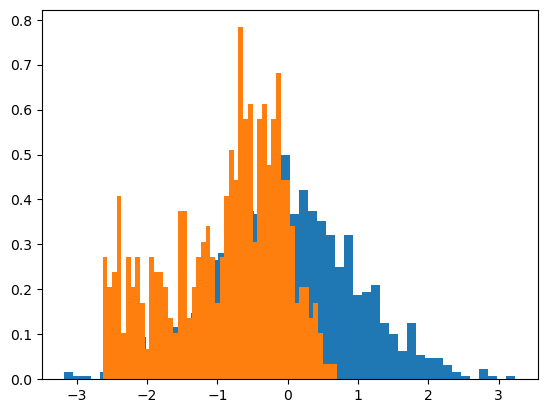

In [69]:
f_gauss = np.random.normal(0,1,1000)
plt.hist(f_gauss, bins=50, density=True)
plt.hist(f, bins=50, density=True)